In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Q7: Plot the TS data( population shares and GDP per capita)

In [2]:
df = pd.read_csv('urbanization-vs-gdp.csv')

df

,Entity,Code,Year,Population share in urban areas,GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,-10000,0.000000e+00,NaN,NaN,14737.0,NaN
2,Afghanistan,AFG,-9000,7.868235e-14,NaN,NaN,20405.0,NaN
3,Afghanistan,AFG,-8000,2.360471e-13,NaN,NaN,28253.0,NaN
4,Afghanistan,AFG,-7000,7.081412e-13,NaN,NaN,39120.0,NaN
...,...,...,...,...,...,...,...,...
62833,Zimbabwe,ZWE,1945,NaN,NaN,NaN,2519116.0,NaN
62834,Zimbabwe,ZWE,1946,NaN,NaN,NaN,2567459.0,NaN
62835,Zimbabwe,ZWE,1947,NaN,NaN,NaN,2616729.0,NaN
62836,Zimbabwe,ZWE,1948,NaN,NaN,NaN,2666945.0,NaN


In [3]:
ndf = df[df['Entity']=='China']

In [4]:
df1 = ndf.sort_values(by='Year')

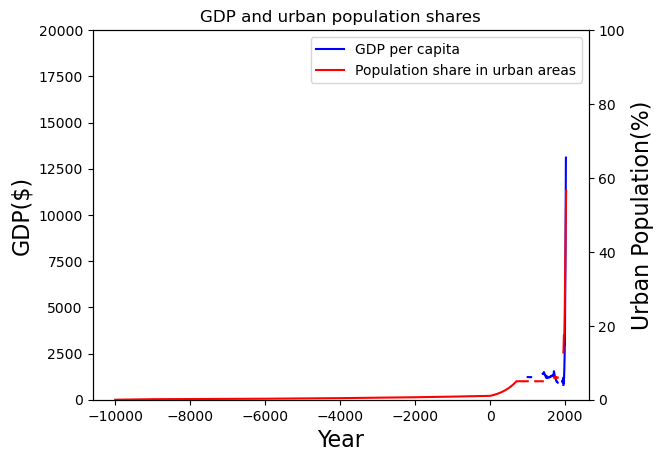

In [5]:
fig, ax1 = plt.subplots()  
ax2 = ax1.twinx()  

line1 = ax1.plot(df1.Year,df1['GDP per capita'], label = 'GDP per capita', color='blue')  
line2 = ax2.plot(df1.Year,df1['Population share in urban areas'], label = 'Population share in urban areas',color='red') 

ax1.set_ylim([0, 20000])
ax2.set_ylim([0,100])

ax1.set_xlabel('Year', fontdict={'size': 16})  
ax1.set_ylabel('GDP($)',fontdict={'size': 16})  
ax2.set_ylabel('Urban Population(%)',fontdict={'size': 16})

plt.title('GDP and urban population shares')  
plt.legend(line1+line2, [h.get_label() for h in line1+line2], loc='best')   
plt.show()

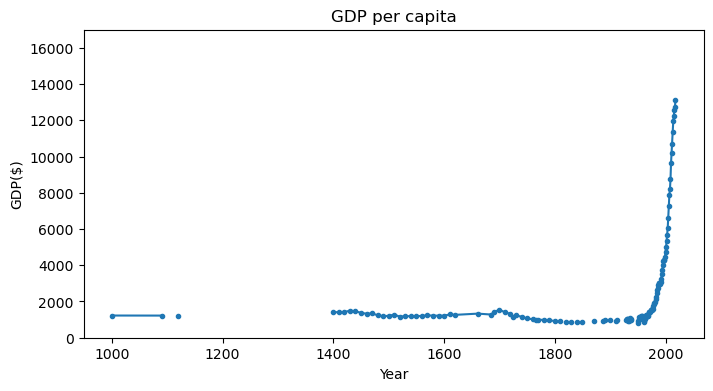

In [6]:
plt.figure(figsize = (8,4))
plt.plot(df1.Year,df1['GDP per capita'], label = 'GDP per capita',marker = '.')
plt.xlabel('Year')
plt.ylabel('GDP($)')
plt.ylim(0,17000)
plt.title('GDP per capita')
plt.show()

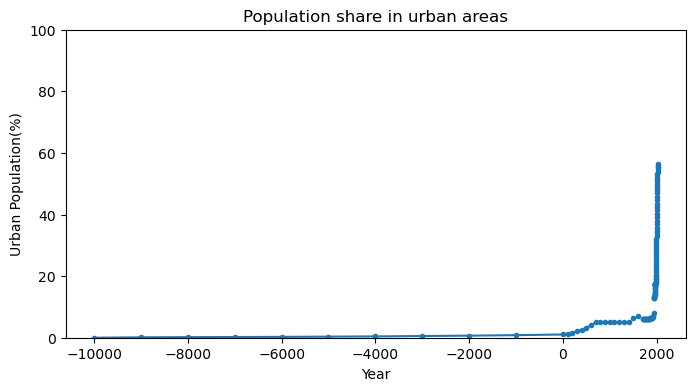

In [7]:
plt.figure(figsize = (8,4))
plt.plot(df1.Year,df1['Population share in urban areas'], label = 'Population share in urban areas',marker = '.')

plt.xlabel('Year')
plt.ylabel('Urban Population(%)')
plt.ylim(0,100)
plt.title('Population share in urban areas')
plt.show()

# Q8: Plot the expression for y = 10, 000, cT0 = 100, and pf (0) = 200.

In [8]:
R = np.arange(0,100,1)
Pf = ((10000-100*R)/10000)**3 * 200

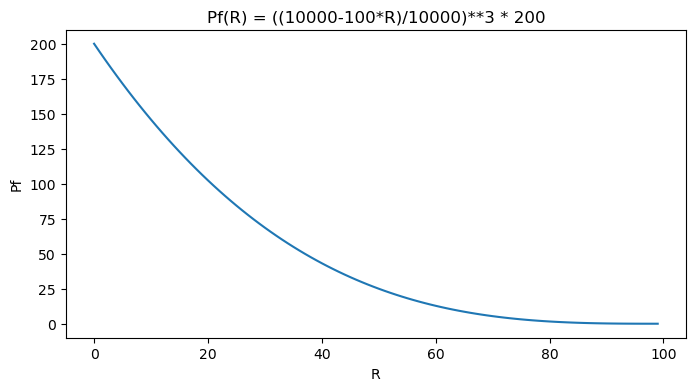

In [9]:
plt.figure(figsize = (8,4))
plt.plot(R,Pf)

plt.xlabel('R')
plt.ylabel('Pf')
plt.title('Pf(R) = ((10000-100*R)/10000)**3 * 200')
plt.show()

# Q10

In [10]:
CB = pd.read_csv('italy_burglary.csv')
CT = pd.read_csv('italy_theft.csv')

In [11]:
CB

,region,population,crime
0,Novara,371686,1942.0
1,Torino,2297917,16500.0
2,Como,598810,3768.0
3,Lecco,340814,2082.0
4,Trento,536237,1832.0
...,...,...,...
106,Salerno,1105485,2325.0
107,Matera,201133,270.0
108,Olbia-Tempio,158518,NaN
109,Medio Campidano,100676,NaN


In [12]:
CT

,region,population,crime
0,Novara,371686,10565.0
1,Torino,2297917,120124.0
2,Como,598810,13673.0
3,Lecco,340814,7530.0
4,Trento,536237,11652.0
...,...,...,...
106,Salerno,1105485,23004.0
107,Matera,201133,2333.0
108,Olbia-Tempio,158518,NaN
109,Medio Campidano,100676,NaN


In [13]:
cdf = CB.merge(CT,on = 'region', how = 'outer')

In [14]:
cdf = cdf.drop('population_y', axis=1)
cdf = cdf.rename(columns={'population_x':'population','crime_x':'burglary','crime_y':'theft'})

In [15]:
data = cdf.dropna(axis=0, how='any')
data['crime'] = data['burglary'] + data['theft']
data['BT rate'] = data['burglary'] / data['theft']
data['crime rate'] = data['crime'] / data['population']

C:\Users\14367\AppData\Local\Temp\ipykernel_24092\3940263338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['crime'] = data['burglary'] + data['theft']
C:\Users\14367\AppData\Local\Temp\ipykernel_24092\3940263338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BT rate'] = data['burglary'] / data['theft']
C:\Users\14367\AppData\Local\Temp\ipykernel_24092\3940263338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [16]:
data

,region,population,burglary,theft,crime,BT rate,crime rate
0,Novara,371686,1942.0,10565.0,12507.0,0.183814,0.033649
1,Torino,2297917,16500.0,120124.0,136624.0,0.137358,0.059456
2,Como,598810,3768.0,13673.0,17441.0,0.275580,0.029126
3,Lecco,340814,2082.0,7530.0,9612.0,0.276494,0.028203
4,Trento,536237,1832.0,11652.0,13484.0,0.157226,0.025146
...,...,...,...,...,...,...,...
104,Pesaro e Urbino,364385,1688.0,7892.0,9580.0,0.213887,0.026291
105,Napoli,3127390,4131.0,82566.0,86697.0,0.050033,0.027722
106,Salerno,1105485,2325.0,23004.0,25329.0,0.101069,0.022912
107,Matera,201133,270.0,2333.0,2603.0,0.115731,0.012942


In [17]:
crd = data.sort_values(by='crime rate')
crd.head(10)

,region,population,burglary,theft,crime,BT rate,crime rate
77,Potenza,377258,427.0,3211.0,3638.0,0.132980,0.009643
43,Oristano,163511,201.0,1407.0,1608.0,0.142857,0.009834
30,Crotone,174068,180.0,1664.0,1844.0,0.108173,0.010594
95,Enna,172456,312.0,1555.0,1867.0,0.200643,0.010826
92,Isernia,87243,131.0,828.0,959.0,0.158213,0.010992
40,Avellino,430214,876.0,3908.0,4784.0,0.224156,0.011120
98,Belluno,209430,459.0,2040.0,2499.0,0.225000,0.011932
47,Sondrio,182480,469.0,1751.0,2220.0,0.267847,0.012166
93,Vibo Valentia,163382,279.0,1804.0,2083.0,0.154656,0.012749
107,Matera,201133,270.0,2333.0,2603.0,0.115731,0.012942


In [18]:
crd.tail(10)

,region,population,burglary,theft,crime,BT rate,crime rate
73,Prato,253245,1681.0,10828.0,12509.0,0.155246,0.049395
99,Venezia,857841,5023.0,39371.0,44394.0,0.127581,0.051751
12,Lucca,394600,2750.0,17811.0,20561.0,0.154399,0.052106
100,Firenze,1007252,5488.0,49030.0,54518.0,0.111931,0.054125
37,Ravenna,392358,3289.0,18350.0,21639.0,0.179237,0.055151
88,Roma,4321244,15997.0,240124.0,256121.0,0.066620,0.059270
1,Torino,2297917,16500.0,120124.0,136624.0,0.137358,0.059456
49,Bologna,1001170,5842.0,61240.0,67082.0,0.095395,0.067004
83,Milano,3176180,20123.0,218888.0,239011.0,0.091933,0.075251
72,Rimini,334254,2115.0,23491.0,25606.0,0.090034,0.076606


In [26]:
# Interestingly, the rates of burglary than theft are higher in smaller cities and generally lower in larger cities. 
# Combined with the number of crimes, it is easy to see that the scale of theft in big cities has significantly expanded, 
# showing a super-linear pattern

In [21]:
popd = data.sort_values(by='population')

In [22]:
popd.head(10)

,region,population,burglary,theft,crime,BT rate,crime rate
92,Isernia,87243,131.0,828.0,959.0,0.158213,0.010992
21,Valle d'Aosta / Vallee d'Aoste,128591,389.0,2181.0,2570.0,0.178359,0.019986
11,Gorizia,141076,370.0,2471.0,2841.0,0.149737,0.020138
31,Nuoro,158980,326.0,2468.0,2794.0,0.132091,0.017575
39,Rieti,159670,461.0,2057.0,2518.0,0.224113,0.015770
32,Verbano-Cusio-Ossola,161412,457.0,2303.0,2760.0,0.198437,0.017099
93,Vibo Valentia,163382,279.0,1804.0,2083.0,0.154656,0.012749
43,Oristano,163511,201.0,1407.0,1608.0,0.142857,0.009834
95,Enna,172456,312.0,1555.0,1867.0,0.200643,0.010826
30,Crotone,174068,180.0,1664.0,1844.0,0.108173,0.010594


In [23]:
popd.tail(10)

,region,population,burglary,theft,crime,BT rate,crime rate
106,Salerno,1105485,2325.0,23004.0,25329.0,0.101069,0.022912
34,Bergamo,1107441,6341.0,34084.0,40425.0,0.186040,0.036503
42,Catania,1115704,3690.0,40485.0,44175.0,0.091145,0.039594
62,Bari,1261964,4400.0,41251.0,45651.0,0.106664,0.036175
84,Brescia,1262295,6325.0,37531.0,43856.0,0.168527,0.034743
55,Palermo,1275598,3367.0,39400.0,42767.0,0.085457,0.033527
1,Torino,2297917,16500.0,120124.0,136624.0,0.137358,0.059456
105,Napoli,3127390,4131.0,82566.0,86697.0,0.050033,0.027722
83,Milano,3176180,20123.0,218888.0,239011.0,0.091933,0.075251
88,Roma,4321244,15997.0,240124.0,256121.0,0.066620,0.059270


In [25]:
# Obviously, the crime rate in small cities will be relatively low, 
# but the crime rate in big cities is not always high, and the crime rate cannot effectively measure the degree of urban danger.


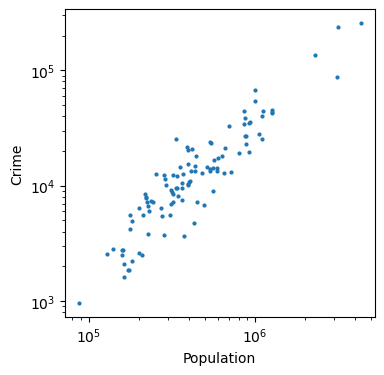

In [19]:
data_xy = np.array(data.population.values)*1.0, np.array(data.crime.values)*1.0
plt.figure(figsize=(4, 4))
plt.plot(*data_xy, ls="", marker='o', ms=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Population")
plt.ylabel("Crime");